In [0]:
try:
  %tensorflow_version 2.x
except:
  pass

In [0]:
import tensorflow as tf
from tensorflow import keras
import glob

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D,Conv1D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical 
import os
import numpy as np
import matplotlib.pyplot as plt
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [4]:
tf.__version__

'2.2.0-rc1'

In [0]:
import tensorflow_datasets as tfds

In [6]:
from keras.datasets import fashion_mnist
(train_Data,train_label),(test_data,test_label)=fashion_mnist.load_data()

Using TensorFlow backend.


In [0]:
num_train_examples=len(train_Data)

In [0]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_Data, train_label))
test_dataset = tf.data.Dataset.from_tensor_slices((test_data,test_label))

In [0]:
train_image_generator = ImageDataGenerator(
    rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        rotation_range=45,
        width_shift_range=0.1,
        height_shift_range=0.1,
        fill_mode='nearest'
        ) 
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [0]:
model=tf.keras.Sequential([
            Flatten(input_shape=(28,28,1)),
            Dense(64,activation='relu'),
            Dropout(0.2),
            Dense(256,activation='relu'),
            Dense(128,activation='relu'),
            Dropout(0.15),
            
            Dense(10)          
  ])
model.compile(optimizer = 'adam',
                  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1

In [0]:
train_Data=train_Data.reshape(60000,28,28,1)
test_data=test_data.reshape(10000,28,28,1)

In [0]:
train_data_gen=train_image_generator.flow(train_Data,train_label)

In [0]:
vali_data_gen=validation_image_generator.flow(test_data,test_label)

In [15]:
history=model.fit(train_data_gen,steps_per_epoch=100,epochs=100,validation_data=vali_data_gen,validation_steps=10)

Epoch 1/100
100/100 [==============================] - 1s 11ms/step - loss: 1.8765 - accuracy: 0.2972 - val_loss: 1.2522 - val_accuracy: 0.5250
Epoch 2/100
100/100 [==============================] - 1s 10ms/step - loss: 1.5126 - accuracy: 0.4347 - val_loss: 1.0958 - val_accuracy: 0.5969
Epoch 3/100
100/100 [==============================] - 1s 10ms/step - loss: 1.4256 - accuracy: 0.4594 - val_loss: 1.0956 - val_accuracy: 0.5906
Epoch 4/100
100/100 [==============================] - 1s 10ms/step - loss: 1.3236 - accuracy: 0.5028 - val_loss: 0.8621 - val_accuracy: 0.7094
Epoch 5/100
100/100 [==============================] - 1s 10ms/step - loss: 1.3005 - accuracy: 0.5134 - val_loss: 0.9313 - val_accuracy: 0.6781
Epoch 6/100
100/100 [==============================] - 1s 10ms/step - loss: 1.2466 - accuracy: 0.5428 - val_loss: 0.8526 - val_accuracy: 0.7156
Epoch 7/100
100/100 [==============================] - 1s 10ms/step - loss: 1.2125 - accuracy: 0.5534 - val_loss: 0.8373 - val_accuracy:

# **training loss vs validation loss with generator class**

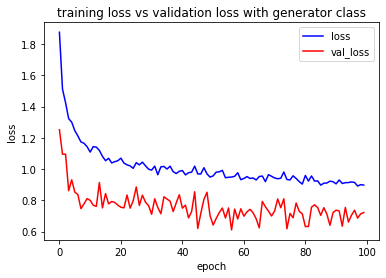

In [16]:
plt.plot(history.history['loss'],'b',label='loss')
plt.plot(history.history['val_loss'],'r',label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('training loss vs validation loss with generator class')
plt.legend()

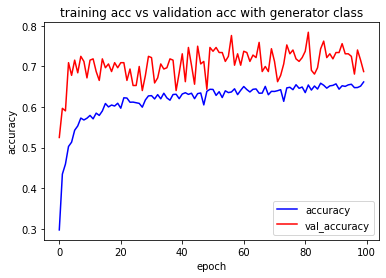

In [17]:
plt.plot(history.history['accuracy'],'b',label='accuracy')
plt.plot(history.history['val_accuracy'],'r',label='val_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('training acc vs validation acc with generator class')
plt.legend()

In [0]:
model2=tf.keras.Sequential([
            Flatten(input_shape=(28,28,1)),
            Dense(64,activation='relu'),
            Dropout(0.2),
            Dense(256,activation='relu'),
            Dense(128,activation='relu'),
            Dropout(0.15),
            
            Dense(10)        
  ])
model2.compile(optimizer = 'adam',
                  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [20]:
history2=model2.fit(x=train_Data,y=train_label,steps_per_epoch=42,epochs=100,validation_data=(test_data,test_label),validation_steps=10)

Epoch 1/100
42/42 [==============================] - 0s 5ms/step - loss: 6.2025 - accuracy: 0.4354 - val_loss: 1.2509 - val_accuracy: 0.6087
Epoch 2/100
42/42 [==============================] - 0s 4ms/step - loss: 1.2765 - accuracy: 0.6012 - val_loss: 0.9313 - val_accuracy: 0.7197
Epoch 3/100
42/42 [==============================] - 0s 4ms/step - loss: 1.0116 - accuracy: 0.6585 - val_loss: 0.7412 - val_accuracy: 0.7124
Epoch 4/100
42/42 [==============================] - 0s 4ms/step - loss: 0.8776 - accuracy: 0.6684 - val_loss: 0.6944 - val_accuracy: 0.7135
Epoch 5/100
42/42 [==============================] - 0s 4ms/step - loss: 0.8236 - accuracy: 0.6804 - val_loss: 0.6659 - val_accuracy: 0.7170
Epoch 6/100
42/42 [==============================] - 0s 4ms/step - loss: 0.7894 - accuracy: 0.6862 - val_loss: 0.6487 - val_accuracy: 0.7168
Epoch 7/100
42/42 [==============================] - 0s 4ms/step - loss: 0.7523 - accuracy: 0.6947 - val_loss: 0.6254 - val_accuracy: 0.7356
Epoch 8/100
4

# **Training loss vs validation loss without generator class**

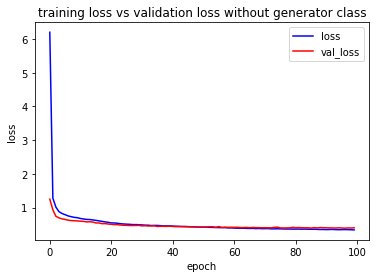

In [21]:
plt.plot(history2.history['loss'],'b',label='loss')
plt.plot(history2.history['val_loss'],'r',label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('training loss vs validation loss without generator class')
plt.legend()

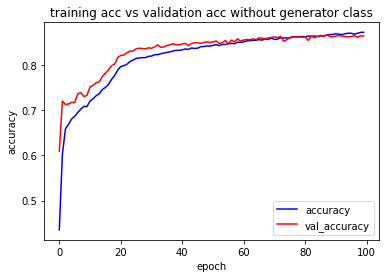

In [22]:
plt.plot(history2.history['accuracy'],'b',label='accuracy')
plt.plot(history2.history['val_accuracy'],'r',label='val_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('training acc vs validation acc without generator class')
plt.legend()

# **Power of singel convolution layer**

In [0]:
model3=tf.keras.Sequential([
            Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28,28,1)),
            MaxPooling2D(2, 2),
            Dropout(0.10),
            Flatten(),
            Dense(64,activation='relu'),
            Dropout(0.2),
            Dense(256,activation='relu'),
            Dense(128,activation='relu'),
            Dropout(0.15),
            Dense(10)        
  ])
model3.compile(optimizer = 'adam',
                  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

In [50]:
history3=model3.fit(x=train_Data,y=train_label,steps_per_epoch=42,epochs=100,validation_data=(test_data,test_label),validation_steps=10)

Epoch 1/100
42/42 [==============================] - 1s 14ms/step - loss: 3.2581 - accuracy: 0.4166 - val_loss: 1.0332 - val_accuracy: 0.6910
Epoch 2/100
42/42 [==============================] - 0s 12ms/step - loss: 1.1883 - accuracy: 0.6075 - val_loss: 0.8491 - val_accuracy: 0.7252
Epoch 3/100
42/42 [==============================] - 1s 12ms/step - loss: 1.0104 - accuracy: 0.6481 - val_loss: 0.7228 - val_accuracy: 0.7418
Epoch 4/100
42/42 [==============================] - 0s 12ms/step - loss: 0.8701 - accuracy: 0.6708 - val_loss: 0.6127 - val_accuracy: 0.7501
Epoch 5/100
42/42 [==============================] - 1s 12ms/step - loss: 0.7737 - accuracy: 0.6881 - val_loss: 0.5802 - val_accuracy: 0.7534
Epoch 6/100
42/42 [==============================] - 0s 12ms/step - loss: 0.7111 - accuracy: 0.7025 - val_loss: 0.5490 - val_accuracy: 0.7598
Epoch 7/100
42/42 [==============================] - 1s 12ms/step - loss: 0.6807 - accuracy: 0.7107 - val_loss: 0.5365 - val_accuracy: 0.7651
Epoch 

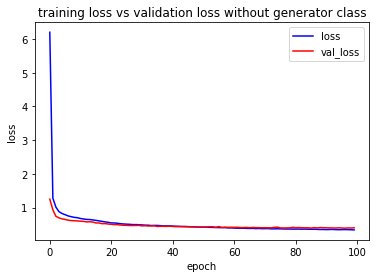

In [51]:
plt.plot(history.history['loss'],'b',label='loss')
plt.plot(history.history['val_loss'],'r',label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('training loss vs validation loss without generator class')
plt.legend()
plt.show()

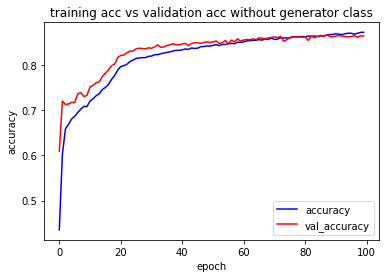

In [52]:
plt.plot(history.history['accuracy'],'b',label='accuracy')
plt.plot(history.history['val_accuracy'],'r',label='val_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('training acc vs validation acc without generator class')
plt.legend()
plt.show()